<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Deni-branch/ImageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import zipfile
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/faceexp.zip')
zipref.extractall('/tmp/dataset')

In [4]:
traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True
      #fill_mode='nearest' 
      )

traingenerator = traindatagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


valdatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0
)

valgenerator = valdatagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
# Model 1
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),     
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),         
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 71, 71, 32)        1

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [7]:
history = model.fit_generator(traingenerator, epochs=15, validation_data=valgenerator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
901/901 [==============================] - 44s 49ms/step - loss: 1.8631 - acc: 0.3032 - val_loss: 1.7191 - val_acc: 0.2914
Epoch 2/15
901/901 [==============================] - 43s 48ms/step - loss: 1.4677 - acc: 0.4393 - val_loss: 1.3820 - val_acc: 0.4724
Epoch 3/15
901/901 [==============================] - 43s 48ms/step - loss: 1.3745 - acc: 0.4791 - val_loss: 1.3796 - val_acc: 0.4633
Epoch 4/15
901/901 [==============================] - 43s 48ms/step - loss: 1.2999 - acc: 0.5071 - val_loss: 1.3086 - val_acc: 0.5021
Epoch 5/15
901/901 [==============================] - 43s 48ms/step - loss: 1.2592 - acc: 0.5302 - val_loss: 1.2291 - val_acc: 0.5371
Epoch 6/15
901/901 [==============================] - 43s 48ms/step - loss: 1.2208 - acc: 0.5457 - val_loss: 1.1785 - val_acc: 0.5517
Epoch 7/15
901/901 [==============================] - 43s 48ms/step - loss: 1.1929 - acc: 0.5541 - val_loss: 1.2259 - va

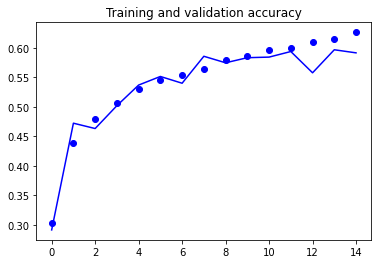

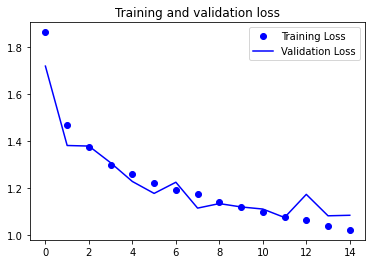

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
del history

NameError: ignored

In [25]:
|

SyntaxError: ignored

In [26]:
traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True
      #fill_mode='nearest' 
      )

traingenerator = traindatagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


valdatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0
)

valgenerator = valdatagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [0]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top= False,
    weights= 'imagenet',
    input_shape= (150,150,3)
)

for layer in pre_trained_model.layers:
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = tf.keras.layers.Flatten()(last_output)
x= tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense( 7, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input,x)

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(traingenerator, epochs=15, validation_data=valgenerator)

Epoch 1/15
901/901 [==============================] - 30s 34ms/step - loss: 1.3911 - acc: 0.4782 - val_loss: 1.1937 - val_acc: 0.5478
Epoch 2/15
901/901 [==============================] - 30s 33ms/step - loss: 1.1922 - acc: 0.5489 - val_loss: 1.1805 - val_acc: 0.5616
Epoch 3/15
901/901 [==============================] - 30s 33ms/step - loss: 1.1016 - acc: 0.5846 - val_loss: 1.1384 - val_acc: 0.5791
Epoch 4/15
901/901 [==============================] - 30s 33ms/step - loss: 1.0248 - acc: 0.6117 - val_loss: 1.1486 - val_acc: 0.5715
Epoch 5/15
901/901 [==============================] - 30s 33ms/step - loss: 0.9795 - acc: 0.6306 - val_loss: 1.1262 - val_acc: 0.5906
Epoch 6/15
901/901 [==============================] - 29s 33ms/step - loss: 0.9132 - acc: 0.6567 - val_loss: 1.1415 - val_acc: 0.5917
Epoch 7/15
901/901 [==============================] - 29s 33ms/step - loss: 0.8574 - acc: 0.6729 - val_loss: 1.1849 - val_acc: 0.5759
Epoch 8/15
901/901 [==============================] - 30s 33ms

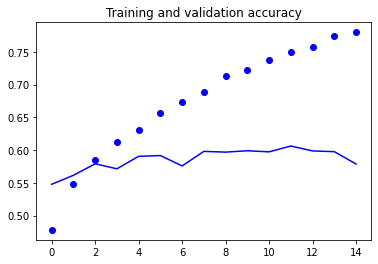

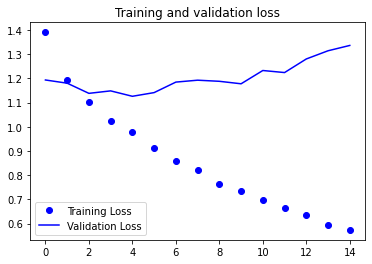

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# Fine Tuning
for layer in pre_trained_model.layers:
  layer.trainable = True

print('Number of layers: ', len(pre_trained_model.layers))

Number of layers:  311


In [0]:
fine_tune_at = 200

for layer in pre_trained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [32]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history_fine = model.fit_generator(traingenerator, epochs=20,initial_epoch= history.epoch[-1], validation_data=valgenerator)

Epoch 15/20
901/901 [==============================] - 34s 38ms/step - loss: 0.7944 - acc: 0.7057 - val_loss: 1.4485 - val_acc: 0.6023
Epoch 16/20
901/901 [==============================] - 33s 37ms/step - loss: 0.6343 - acc: 0.7625 - val_loss: 1.4624 - val_acc: 0.6076
Epoch 17/20
901/901 [==============================] - 33s 37ms/step - loss: 0.5573 - acc: 0.7913 - val_loss: 1.5457 - val_acc: 0.6084
Epoch 18/20
901/901 [==============================] - 33s 37ms/step - loss: 0.5091 - acc: 0.8093 - val_loss: 1.4892 - val_acc: 0.6136
Epoch 19/20
901/901 [==============================] - 33s 37ms/step - loss: 0.4666 - acc: 0.8249 - val_loss: 1.6625 - val_acc: 0.6162
Epoch 20/20
901/901 [==============================] - 33s 37ms/step - loss: 0.4301 - acc: 0.8395 - val_loss: 1.6093 - val_acc: 0.6125


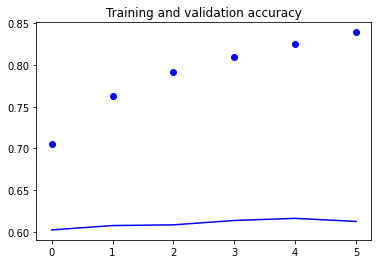

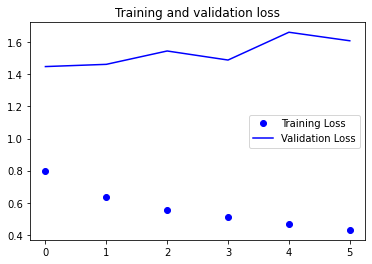

In [33]:
import matplotlib.pyplot as plt
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
del history
del history_fine

In [35]:
# VGG19

traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

traindatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True
      #fill_mode='nearest' 
      )

traingenerator = traindatagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


valdatagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale=1/255.0
)

valgenerator = valdatagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [0]:
pre_trained_model = tf.keras.applications.VGG19(
    include_top= False,
    weights= 'imagenet',
    input_shape= (150,150,3)
)

for layer in pre_trained_model.layers:
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

x = tf.keras.layers.Flatten()(last_output)
x= tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense( 7, activation='softmax')(x)

model = tf.keras.Model(pre_trained_model.input,x)

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(traingenerator, epochs=10, validation_data=valgenerator)

Epoch 1/10
901/901 [==============================] - 57s 63ms/step - loss: 1.5861 - acc: 0.3858 - val_loss: 1.4324 - val_acc: 0.4509
Epoch 2/10
901/901 [==============================] - 56s 62ms/step - loss: 1.4566 - acc: 0.4386 - val_loss: 1.5128 - val_acc: 0.4063
Epoch 3/10
901/901 [==============================] - 56s 62ms/step - loss: 1.3983 - acc: 0.4659 - val_loss: 1.3135 - val_acc: 0.4993
Epoch 4/10
901/901 [==============================] - 56s 63ms/step - loss: 1.3743 - acc: 0.4721 - val_loss: 1.3164 - val_acc: 0.5031
Epoch 5/10
901/901 [==============================] - 56s 63ms/step - loss: 1.3387 - acc: 0.4885 - val_loss: 1.2714 - val_acc: 0.5119
Epoch 6/10
901/901 [==============================] - 56s 62ms/step - loss: 1.3268 - acc: 0.4909 - val_loss: 1.2975 - val_acc: 0.5144
Epoch 7/10
901/901 [==============================] - 56s 62ms/step - loss: 1.3163 - acc: 0.4939 - val_loss: 1.3110 - val_acc: 0.5000
Epoch 8/10
901/901 [==============================] - 56s 62ms

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(traingenerator, epochs=20,initial_epoch= history.epoch[-1], validation_data=valgenerator)

Epoch 10/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2565 - acc: 0.5141 - val_loss: 1.2665 - val_acc: 0.5229
Epoch 11/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2370 - acc: 0.5200 - val_loss: 1.2896 - val_acc: 0.5074
Epoch 12/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2275 - acc: 0.5238 - val_loss: 1.2596 - val_acc: 0.5204
Epoch 13/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2175 - acc: 0.5301 - val_loss: 1.2786 - val_acc: 0.5156
Epoch 14/20
901/901 [==============================] - 56s 62ms/step - loss: 1.2082 - acc: 0.5304 - val_loss: 1.2968 - val_acc: 0.5013
Epoch 15/20
901/901 [==============================] - 56s 62ms/step - loss: 1.1983 - acc: 0.5353 - val_loss: 1.2601 - val_acc: 0.5113
Epoch 16/20
901/901 [==============================] - 56s 62ms/step - loss: 1.1901 - acc: 0.5415 - val_loss: 1.2675 - val_acc: 0.5177
Epoch 17/20
901/901 [==============================] - 

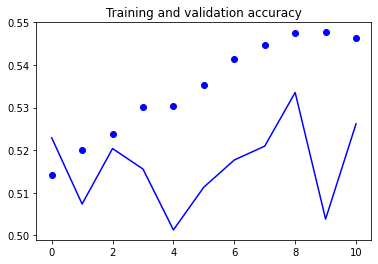

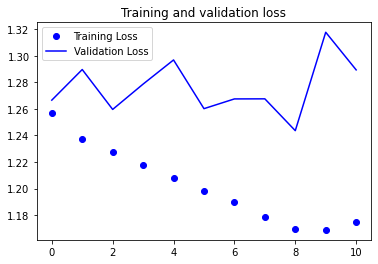

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Fine Tuning
for layer in pre_trained_model.layers:
  layer.trainable = True

print('Number of layers: ', len(pre_trained_model.layers))

In [0]:
fine_tune_at = 200

for layer in pre_trained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
history_fine = model.fit_generator(traingenerator, epochs=20,initial_epoch= history.epoch[-1], validation_data=valgenerator)

In [0]:
import matplotlib.pyplot as plt
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()